# Project "The relationship between companies' stock prices and their internet presence"

## Data preparation

In [63]:
#Dependencies
#%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as datetime
from scipy import stats
from sklearn.linear_model import LinearRegression

In [34]:
#Files to load 
stock_data_to_load = "Stock_data.csv"
google_trends_data_to_load = "Google_trends_data.csv"
twitter_data_to_load = "Twitter_data.csv"
news_data_to_load = "News_data.csv"

# Read the data
stock_data = pd.read_csv(stock_data_to_load)
google_trends_data = pd.read_csv(google_trends_data_to_load)
twitter_data = pd.read_csv(twitter_data_to_load)
news_data = pd.read_csv(news_data_to_load)


In [35]:
stock_data.head()

,date,open,high,low,close,volume,Company Name
0,2018-04-05,289.3400,306.26,288.20,305.72,19121101,"Tesla, Inc."
1,2018-04-06,301.0000,309.28,295.50,299.30,13520286,"Tesla, Inc."
2,2018-04-09,300.3700,309.50,289.21,289.66,10249805,"Tesla, Inc."
3,2018-04-10,298.9700,307.10,293.68,304.70,11024259,"Tesla, Inc."
4,2018-04-11,300.7403,308.98,299.66,300.93,7482945,"Tesla, Inc."


In [36]:
stock_data = stock_data.rename(index=str, columns={"date": "Date"})
stock_data.head()

,Date,open,high,low,close,volume,Company Name
0,2018-04-05,289.3400,306.26,288.20,305.72,19121101,"Tesla, Inc."
1,2018-04-06,301.0000,309.28,295.50,299.30,13520286,"Tesla, Inc."
2,2018-04-09,300.3700,309.50,289.21,289.66,10249805,"Tesla, Inc."
3,2018-04-10,298.9700,307.10,293.68,304.70,11024259,"Tesla, Inc."
4,2018-04-11,300.7403,308.98,299.66,300.93,7482945,"Tesla, Inc."


In [37]:
google_trends_data.head()

,date,Tesla,Netflix,Google,isPartial
0,2019-01-04,28,14,63,False
1,2019-01-05,26,48,57,False
2,2019-01-06,12,32,24,False
3,2019-01-07,17,23,66,False
4,2019-01-08,13,22,31,False


In [38]:
#Transform the data for merging
google_trends_data = pd.melt(google_trends_data, id_vars=["date"], 
                  var_name="Search Query", value_name="Popularity Rate")

In [39]:
google_trends_data.head()

,date,Search Query,Popularity Rate
0,2019-01-04,Tesla,28
1,2019-01-05,Tesla,26
2,2019-01-06,Tesla,12
3,2019-01-07,Tesla,17
4,2019-01-08,Tesla,13


In [40]:
google_trends_data["Company Name"] = ""
google_trends_data.loc[google_trends_data["Search Query"] == "Tesla", "Company Name"] = "Tesla, Inc."
google_trends_data.loc[google_trends_data["Search Query"] == "Google", "Company Name"] = "Google LLC"
google_trends_data.loc[google_trends_data["Search Query"] == "Netflix", "Company Name"] = "Netflix, Inc."

In [41]:
google_trends_data = google_trends_data.rename(index=str, columns={"date": "Date"})

In [42]:
google_trends_data.head()

,Date,Search Query,Popularity Rate,Company Name
0,2019-01-04,Tesla,28,"Tesla, Inc."
1,2019-01-05,Tesla,26,"Tesla, Inc."
2,2019-01-06,Tesla,12,"Tesla, Inc."
3,2019-01-07,Tesla,17,"Tesla, Inc."
4,2019-01-08,Tesla,13,"Tesla, Inc."


In [43]:
twitter_data.head()

,Date,Twitter Account,Total Tweets,Average Positive Score,Average Negative Score,Average Neutral Score,Total Retweets,Total Likes,Company Name
0,2014-06-02,@reedhastings,1,0.3100,0.000,0.6900,2,3,"Netflix, Inc."
1,2014-08-06,@reedhastings,1,0.0000,0.114,0.8860,20,0,"Netflix, Inc."
2,2014-08-24,@reedhastings,2,0.1925,0.000,0.8075,32,0,"Netflix, Inc."
3,2014-08-25,@reedhastings,1,0.4050,0.074,0.5210,1,0,"Netflix, Inc."
4,2014-08-26,@reedhastings,1,0.0000,0.000,1.0000,191,0,"Netflix, Inc."


In [44]:
news_data.head()

,Date,Company Name,Total News (per day),Average Positive Score,Average Negative Score,Average Neutral Score
0,2019-03-06,"Tesla, Inc.",1,0.042,0.911,0.047
1,2019-03-07,"Tesla, Inc.",2,0.201,0.799,0.000
2,2019-03-08,"Netflix, Inc.",1,0.085,0.915,0.000
3,2019-03-11,"Tesla, Inc.",2,0.000,1.000,0.000
4,2019-03-12,Google LLC,1,0.159,0.795,0.046


In [45]:
# Combine the stock data and google trends into a single dataset
stock_vs_google_trends = pd.merge(stock_data, google_trends_data, on=["Date", "Company Name"], how="left")

In [46]:
#stock_vs_google_trends.reset_index(inplace=True)
stock_vs_google_trends.head()

,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
0,2018-04-05,289.3400,306.26,288.20,305.72,19121101,"Tesla, Inc.",NaN,NaN
1,2018-04-06,301.0000,309.28,295.50,299.30,13520286,"Tesla, Inc.",NaN,NaN
2,2018-04-09,300.3700,309.50,289.21,289.66,10249805,"Tesla, Inc.",NaN,NaN
3,2018-04-10,298.9700,307.10,293.68,304.70,11024259,"Tesla, Inc.",NaN,NaN
4,2018-04-11,300.7403,308.98,299.66,300.93,7482945,"Tesla, Inc.",NaN,NaN


In [47]:
stock_vs_google_trends = stock_vs_google_trends.dropna()

In [48]:
stock_vs_google_trends.reset_index(inplace=True)

In [49]:
stock_vs_google_trends.head()

,index,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
0,189,2019-01-04,306.00,318.0000,302.7300,317.69,7394116,"Tesla, Inc.",Tesla,28
1,190,2019-01-07,321.72,336.7400,317.7508,334.96,7551225,"Tesla, Inc.",Tesla,17
2,191,2019-01-08,341.96,344.0100,327.0200,335.35,7008516,"Tesla, Inc.",Tesla,13
3,192,2019-01-09,335.50,343.5025,331.4700,338.53,5432945,"Tesla, Inc.",Tesla,26
4,193,2019-01-10,334.40,345.3900,331.7900,344.97,6056354,"Tesla, Inc.",Tesla,29


In [50]:
stock_vs_google_trends.tail()

,index,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
175,746,2019-03-26,367.870,368.38,358.02,359.97,7666475,"Netflix, Inc.",Netflix,17
176,747,2019-03-27,361.000,362.47,350.37,353.37,7852370,"Netflix, Inc.",Netflix,24
177,748,2019-03-28,354.485,355.94,349.20,354.61,4360960,"Netflix, Inc.",Netflix,21
178,749,2019-03-29,357.160,358.25,353.71,356.56,4705636,"Netflix, Inc.",Netflix,15
179,750,2019-04-01,359.000,368.33,358.51,366.96,7036097,"Netflix, Inc.",Netflix,30


## Visualization

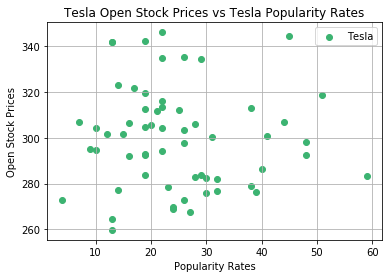

In [51]:
#Relationship between Open Stock Prices and Popularity Rate

tesla_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Popularity Rate"]
tesla_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "open"]

tesla = plt.scatter(tesla_x, tesla_y, label='Tesla', c="#3CB371")

plt.title("Tesla Open Stock Prices vs Tesla Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Tesla_scatter.png", dpi = 400)

plt.show()

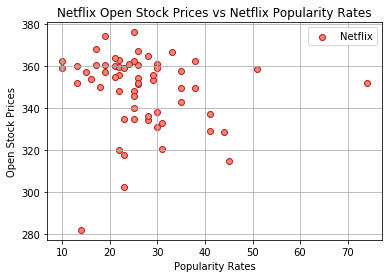

In [52]:
netflix_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Popularity Rate"]
netflix_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "open"]

netflix = plt.scatter(netflix_x, netflix_y, label='Netflix', c="#FA8072", edgecolors="#B22222")

plt.title("Netflix Open Stock Prices vs Netflix Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Netflix_scatter.png", dpi = 400)

plt.show()

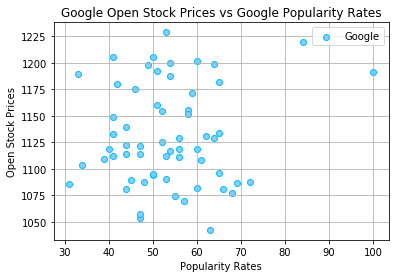

In [53]:
google_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Popularity Rate"]
google_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "open"]


google = plt.scatter(google_x, google_y, label='Google', c="#87CEFA", edgecolors="#00BFFF")

plt.title("Google Open Stock Prices vs Google Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Google_scatter.png", dpi = 400)

plt.show()

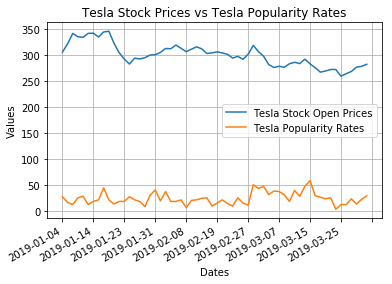

In [54]:
tesla_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Date"]
tesla_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "open"]

tesla_google_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Date"]
tesla_google_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Popularity Rate"]


fig, ax = plt.subplots()

tesla_stock, = ax.plot(tesla_stock_x, tesla_stock_y, label='Tesla Stock Open Prices')
tesla_google_trends, = ax.plot(tesla_google_trends_x, tesla_google_trends_y, label='Tesla Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Tesla Stock Prices vs Tesla Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Tesla_lines.png", dpi = 400)

plt.show()

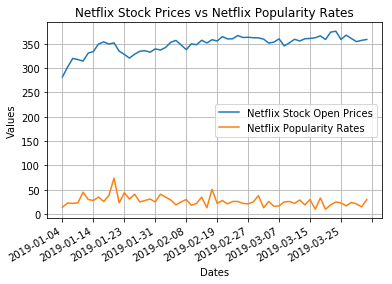

In [55]:
netflix_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Date"]
netflix_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "open"]

netflix_google_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Date"]
netflix_google_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Popularity Rate"]

fig, ax = plt.subplots()

netflix_stock, = ax.plot(netflix_stock_x, netflix_stock_y, label='Netflix Stock Open Prices')
netflix_google_trends, = ax.plot(netflix_google_trends_x, netflix_google_trends_y, label='Netflix Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Netflix Stock Prices vs Netflix Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Netflix_lines.png", dpi = 400)

plt.show()

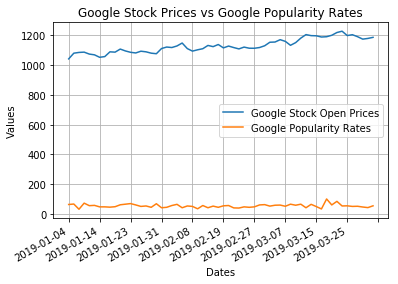

In [56]:
google_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Date"]
google_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "open"]

google_comp_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Date"]
google_comp_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Popularity Rate"]

fig, ax = plt.subplots()

google_stock, = ax.plot(google_stock_x, google_stock_y, label='Google Stock Open Prices')
google_comp_trends, = ax.plot(google_comp_trends_x, google_comp_trends_y, label='Google Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Google Stock Prices vs Google Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Google_lines.png", dpi = 400)

plt.show()

## Statistics

In [57]:
# Combine the data into a single dataset (outer join)

df_step_1 = pd.merge(stock_data, google_trends_data, on=["Date", "Company Name"], how="outer")

df_step_2 = pd.merge(df_step_1, twitter_data, on=["Date", "Company Name"], how="outer")

combined_data_outer_join = pd.merge(df_step_2, news_data, on=["Date", "Company Name"], how="outer", suffixes=('', '_news'))


In [58]:
combined_data_outer_join

,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate,Twitter Account,Total Tweets,Average Positive Score,Average Negative Score,Average Neutral Score,Total Retweets,Total Likes,Total News (per day),Average Positive Score_news,Average Negative Score_news,Average Neutral Score_news
0,2018-04-05,289.3400,306.2600,288.2000,305.720,19121101.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-06,301.0000,309.2800,295.5000,299.300,13520286.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-09,300.3700,309.5000,289.2100,289.660,10249805.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-10,298.9700,307.1000,293.6800,304.700,11024259.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-11,300.7403,308.9800,299.6600,300.930,7482945.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-04-12,302.3200,303.9500,293.6800,294.080,7608769.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-04-13,303.6000,303.9499,295.9800,300.340,7327223.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-04-16,299.0000,299.6600,289.0100,291.210,6338488.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-17,288.8700,292.1700,282.5100,287.690,7000023.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-18,291.0800,300.2400,288.1600,293.350,6557700.0,"Tesla, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
combined_data = combined_data_outer_join.fillna(0)

In [60]:
combined_data

,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate,Twitter Account,Total Tweets,Average Positive Score,Average Negative Score,Average Neutral Score,Total Retweets,Total Likes,Total News (per day),Average Positive Score_news,Average Negative Score_news,Average Neutral Score_news
0,2018-04-05,289.3400,306.2600,288.2000,305.720,19121101.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-06,301.0000,309.2800,295.5000,299.300,13520286.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-09,300.3700,309.5000,289.2100,289.660,10249805.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-10,298.9700,307.1000,293.6800,304.700,11024259.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-11,300.7403,308.9800,299.6600,300.930,7482945.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-04-12,302.3200,303.9500,293.6800,294.080,7608769.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,2018-04-13,303.6000,303.9499,295.9800,300.340,7327223.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-04-16,299.0000,299.6600,289.0100,291.210,6338488.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,2018-04-17,288.8700,292.1700,282.5100,287.690,7000023.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,2018-04-18,291.0800,300.2400,288.1600,293.350,6557700.0,"Tesla, Inc.",0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
combined_data_final = combined_data.loc[combined_data["Date"].str.contains('2019', regex=False) == True, ["Date", "open", "Company Name", "Popularity Rate", "Total Tweets", "Average Positive Score", "Average Negative Score", "Average Neutral Score", "Total News (per day)",]]

In [87]:
combined_data_final

,Date,open,Company Name,Popularity Rate,Total Tweets,Average Positive Score,Average Negative Score,Average Neutral Score,Total News (per day)
227,2019-03-01,306.94,"Tesla, Inc.",44,0.0,0.000000,0.000000,0.000000,0.0
228,2019-03-04,298.12,"Tesla, Inc.",48,0.0,0.000000,0.000000,0.000000,0.0
229,2019-03-05,282.00,"Tesla, Inc.",32,0.0,0.000000,0.000000,0.000000,0.0
230,2019-03-06,276.48,"Tesla, Inc.",39,0.0,0.000000,0.000000,0.000000,1.0
231,2019-03-07,278.84,"Tesla, Inc.",38,0.0,0.000000,0.000000,0.000000,2.0
232,2019-03-08,276.91,"Tesla, Inc.",32,0.0,0.000000,0.000000,0.000000,0.0
233,2019-03-11,283.52,"Tesla, Inc.",19,0.0,0.000000,0.000000,0.000000,2.0
234,2019-03-12,286.49,"Tesla, Inc.",40,0.0,0.000000,0.000000,0.000000,0.0
235,2019-03-13,283.90,"Tesla, Inc.",29,0.0,0.000000,0.000000,0.000000,0.0
236,2019-03-14,292.45,"Tesla, Inc.",48,1.0,0.082000,0.146000,0.773000,0.0


In [88]:
X = combined_data_final.drop(['open', 'Date','Company Name'], axis=1)
y = combined_data_final['open']

In [89]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.40757858605965447


In [111]:
model.coef_

array([ 11.76578057,  -8.72910186, 184.27420536, -76.87415005,
        19.53473694,   7.19182481])

In [110]:
model.intercept_

-5.691169326787644